In [20]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import torchviz

In [21]:
class ThreeLayersNet(nn.Module):
    def __init__(self, nX, nH1, nH2, nY):        
        super(ThreeLayersNet, self).__init__()     # конструктор         
        self.fc1 = nn.Linear(nX, nH1)             # створення параметрів моделі
        self.fc2 = nn.Linear(nH1, nH2)             # у повнозв'язкових шарах
        self.fc3 = nn.Linear(nH2, nY)
          
    def forward(self, x):                        # задаємо прямий прохід
        x = self.fc1(x)                          # вихід першого шару
        x = nn.Sigmoid()(x)                      # сигмоїдна активація
        x = self.fc2(x)                          # вихід другого шару
        x = nn.Sigmoid()(x)                      # сигмоїдна активація
        x = self.fc3(x)
        x = nn.Sigmoid()(x)
        return x

In [22]:
X = torch.rand (1200, 2)
Y = (torch.sum((X - 0.5)**2, axis=1) < 0.1).float().view(-1,1)

In [23]:
model = ThreeLayersNet(2, 5, 3, 1)                                  

loss = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.08)

In [24]:
def fit(model, X,Y, batch_size=100, train=True):
    model.train(train)
    sumL, sumA, numB = 0, 0, int( len(X)/batch_size )

    for i in range(0, numB*batch_size, batch_size):
        xb = X[i: i+batch_size]                          # поточний батч
        yb = Y[i: i+batch_size]                          # тензори поточного батчу

        y = model(xb)                                    # пряме розповсюдження
        L = loss(y, yb)                                  # похибка
  
        if train:                                        # в режимі навчання
            optimizer.zero_grad()                        # обнуляємо градієнти,        
            L.backward()                                 # обчислюємо градієнти,            
            optimizer.step()                             # підганяємо параметри
                                     
        sumL += L.item()                                 # сумарна похибка
        sumA += (y.round() == yb).float().mean()         # точність визначення окремого класу
         
        return sumL/numB,  sumA/numB   

In [25]:
                                                         # режим оцінки моделі
print( "before:      loss: %.4f accuracy: %.4f" %  fit(model, X,Y) )

epochs = 1000                                            # число епох
for epoch in range(epochs):                              # епоха: прохід
    L,A = fit(model, X, Y)                               # по всьому датасету
     
    if epoch % 100 == 0 or epoch == epochs-1:                 
        print(f'epoch: {epoch:5d} loss: {L:.4f} accuracy: {A:.4f}' ) 

before:      loss: 0.0292 accuracy: 0.0233
epoch:     0 loss: 0.0251 accuracy: 0.0233
epoch:   100 loss: 0.0168 accuracy: 0.0600
epoch:   200 loss: 0.0128 accuracy: 0.0600
epoch:   300 loss: 0.0008 accuracy: 0.0825
epoch:   400 loss: 0.0003 accuracy: 0.0833
epoch:   500 loss: 0.0002 accuracy: 0.0833
epoch:   600 loss: 0.0001 accuracy: 0.0833
epoch:   700 loss: 0.0001 accuracy: 0.0833
epoch:   800 loss: 0.0001 accuracy: 0.0833
epoch:   900 loss: 0.0000 accuracy: 0.0833
epoch:   999 loss: 0.0000 accuracy: 0.0833


In [26]:
print(model)

ThreeLayersNet(
  (fc1): Linear(in_features=2, out_features=5, bias=True)
  (fc2): Linear(in_features=5, out_features=3, bias=True)
  (fc3): Linear(in_features=3, out_features=1, bias=True)
)


In [27]:
dict(model.named_parameters())

{'fc1.weight': Parameter containing:
 tensor([[  6.3135, -12.1966],
         [ 14.6174,  -1.0772],
         [  5.2429,   8.1355],
         [  3.0021,   7.8546],
         [ 12.9333,   9.6020]], requires_grad=True),
 'fc1.bias': Parameter containing:
 tensor([ 0.6313, -2.9833, -8.8850, -7.0555, -7.7734], requires_grad=True),
 'fc2.weight': Parameter containing:
 tensor([[ 18.1501, -14.7048,  13.7083,  11.3967,  -7.5327],
         [  4.4494,  -3.6967,   0.2369,  -0.4145,  -1.6988],
         [  1.4274,   2.0034,   1.2252,   1.1079,   1.2080]],
        requires_grad=True),
 'fc2.bias': Parameter containing:
 tensor([5.0773, 0.9679, 1.6489], requires_grad=True),
 'fc3.weight': Parameter containing:
 tensor([[-12.0226,  -1.6342,   3.0064]], requires_grad=True),
 'fc3.bias': Parameter containing:
 tensor([2.8627], requires_grad=True)}

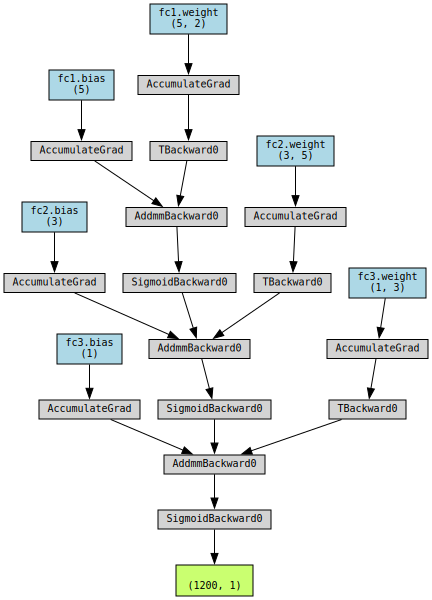

In [28]:
torchviz.make_dot(model(X), params = dict(model.named_parameters()))